# Дано: f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30    

In [57]:
# Импортируем необходимое:
import numpy as np
import matplotlib.pyplot as plt
from sympy import sin, cos, Symbol, diff

# Необходимые функции:

# Поиск корней методом дихотомии на отрезке [a, b]: 
def roots_search(function, a, b, eps):
    while (b - a > eps):
        c = (a + b) / 2
        if f(b) * f(c) < 0:
            a = c
        else:
            b = c
    
    return (a + b) / 2

# Определяем функцию:
x = Symbol('x')
def f(x):
    return -12*(x**4)*sin(cos(x)) - 18*(x**3) + 5*(x**2) + 10*x - 30

## 1. Построить график функции  
### Строим график функции для отрезка [30, 40]

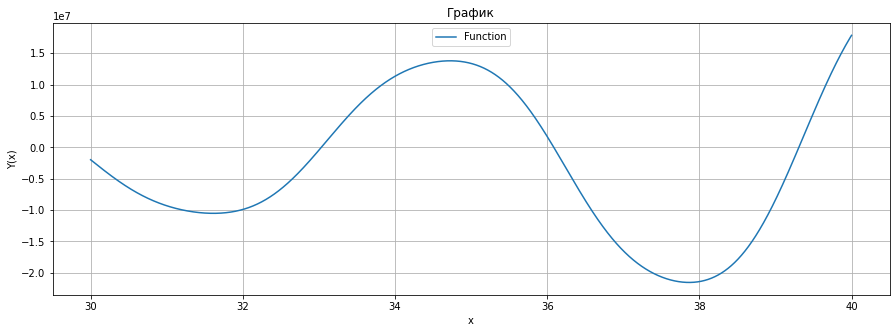

In [58]:
# 4. Построить график


z = np.linspace(30, 40, 10000)
f1 = lambda x: -12*x**4*np.sin(np.cos(z)) - 18*(x**3)+5*(x**2) + 10*x - 30

fig, ax = plt.subplots(figsize = (15,5))

plt.title('График')
plt.xlabel('x')
plt.ylabel('Y(x)')

plt.plot(z, f1(z), label='Function')
plt.legend(loc='upper center')
plt.grid()

plt.show()

## 2. Определяем корни  
### Видим, что существует 3 корня на интервалах [32, 34], [36, 37], [39, 40]

In [59]:
# Находим корни на отрезке [30, 40]
root_intervals = [[32, 34], [36, 37], [39, 40]]
roots_list = [roots_search(f, i[0], i[1], 1e-6) for i in root_intervals]
roots_list

[33.03176164627075, 36.0870623588562, 39.307804584503174]

## 3. Определить промежутки, на котором f(x) > 0 и f(x) < 0

In [87]:
def neg_pos_func(func, a, b, eps):
    '''
    a - левая граница отрезка
    b - правая граница отрезка
    eps - погрешность type - int
    '''

    x = [x/eps for x in range(a*eps, b*eps + 1)]
    y = [func(x) for x in x]

    points = list(zip(x, y))
    pos_f, neg_f = [], []
    incr_flag = False
    while len(points) >= 2:
        count = 0
        if incr_flag:
            while points[count][0] < b and points[count][1] > 0:
                count += 1
            if count != 0:
                pos_f.append([points[0][0], points[count - 2][0]])
            incr_flag = False
        else:
            while points[count][0] < b and points[count][1] < 0:
                count += 1
            if count != 0:
                neg_f.append([points[0][0], points[count - 2][0]])
            incr_flag = True
        del points[:count]

    return [pos_f, neg_f]
    
res1 = neg_pos_func(f, 30, 40, 100)
print('f(x) > 0 на интервалах:')
print(*res1[0])
print('f(x) < 0 на интервалах:')
print(*res1[1])

f(x) > 0 на интервалах:
[33.04, 36.07] [39.31, 39.98]
f(x) < 0 на интервалах:
[30.0, 33.02] [36.09, 39.29]


## 4. Найти интервалы, на которых функция возрастает на отрезке и убывает [30, 40]

### Находим производную f(x):

In [60]:
print(diff(f(x), x))

12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10


### Находим интервалы:

In [89]:
# Определяем производную функции:
def d_f(x):
    return 12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10

res2 = neg_pos_func(d_f, 30, 40, 100)
print('f(x) возрастает на интервалах:')
print(*res2[0])
print('f(x) убывает на интервалах:')
print(*res2[1])

f(x) возрастает на интервалах:
[31.62, 34.71] [37.87, 39.98]
f(x) убывает на интервалах:
[30.0, 31.6] [34.73, 37.85]


### Строим график производной на отрезке [30, 40]:

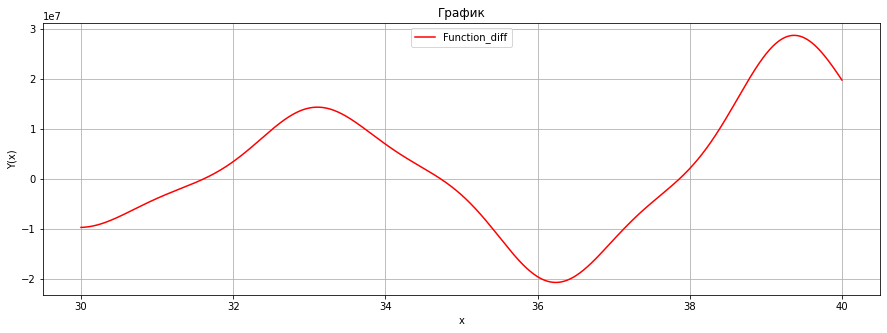

In [61]:
# Строим график производной:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(30, 40, 10000)
def f2(x):
    return (12*x**4*np.sin(x)*np.cos(np.cos(x)) - 48*x**3*np.sin(np.cos(x)) - 54*x**2 + 10*x + 10)

fig, ax = plt.subplots(figsize = (15,5))

plt.title('График')
plt.xlabel('x')
plt.ylabel('Y(x)')


plt.plot(z, f2(z), label='Function_diff', color='red')
plt.legend(loc='upper center')
plt.grid()

plt.show()

## 5. Вычислить вершину
### Находим вершины функции методом дихотомии, при d_f = 0 на отрезках [30, 32], [34, 36], [36, 38]:

In [73]:
# Определяем производную функции:
def d_f(x):
    return 12*x**4*sin(x)*cos(cos(x)) - 48*x**3*sin(cos(x)) - 54*x**2 + 10*x + 10

top_intervals = [[30, 32], [34, 35], [37, 38]]

top_list = [roots_search(d_f, i[0], i[1], 0.01) for i in extr_intervals]

print('Получены вершины в точках: ')
print(*top_list)

# round(d_f(31.61408111846),5) - один из корней (найден вручную)

Получены вершины в точках: 
30.00390625 34.00390625 37.00390625


***Не находит корни для d_f = 0, пока не смог исправить. Хотя корни самой функции нашлись успешно***